In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
from torch.autograd import Variable

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [25]:
df = pd.read_csv('house_prices.csv')

In [26]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [27]:
df = pd.get_dummies(df)

In [28]:
df = df.dropna()

In [29]:
df.drop(columns='Id', inplace=True)

In [30]:
Y = df.pop('SalePrice').values
X = df.values

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X = pca.fit_transform(X)

In [32]:
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X,
    Y,
    test_size=0.20,
    random_state=1,
    shuffle=True
)
X_validation_numpy = np.asarray(X_validation).astype('float32')
X_train_numpy = np.asarray(X_train).astype('float32')
Y_train_numpy = np.asarray(Y_train).astype('float32')
Y_validation_numpy = np.asarray(Y_validation).astype('float32')

X_train_tensor = torch.from_numpy(X_train_numpy)
Y_train_tensor = torch.from_numpy(Y_train_numpy)
X_validation_tensor = torch.from_numpy(X_validation_numpy)
Y_validation_tensor = torch.from_numpy(Y_validation_numpy)

In [33]:
x = X_train_tensor
y = Y_train_tensor

In [34]:
x, y = Variable(x), Variable(y)

In [35]:
features_num = len(x[0])

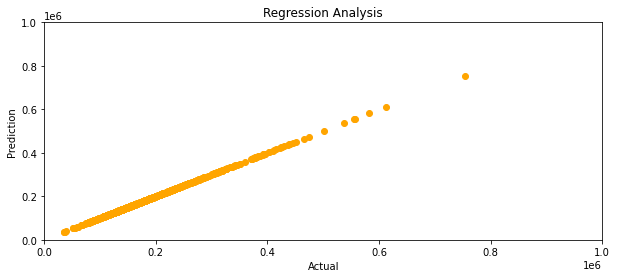

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([1168])) that is different to the input size (torch.Size([1168, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


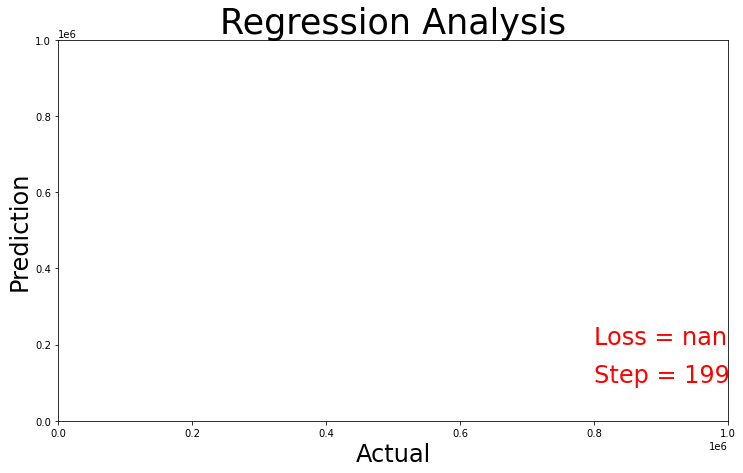

In [36]:
plt.figure(figsize=(10,4))
plt.title('Regression Analysis')
plt.scatter(y.data.numpy(), y.data.numpy(), color = "orange")
plt.xlim(0, 1000000)
plt.ylim(0, 1000000)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

reg_model = torch.nn.Linear(in_features=features_num, out_features=1, bias=True)    

net = Net(n_feature=features_num, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
optimizer = torch.optim.SGD(reg_model.parameters(), lr=0.002)

my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# train the network
for t in range(200):
  
    prediction = reg_model(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('Actual', fontsize=24)
    ax.set_ylabel('Prediction', fontsize=24)
    ax.set_xlim(0, 1000000)
    ax.set_ylim(-500, 1000000)
    ax.scatter(y.data.numpy(), prediction.data.numpy(), color = "orange")
    ax.text(800000, 100000, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(800000, 200000, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    
   


# save images as a gif    
imageio.mimsave('./curve_1.gif', my_images, fps=10)

In [37]:
len(x)

1168

In [38]:
reg_model(x)

tensor([[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]], grad_fn=<AddmmBackward0>)